## Assignment 1: Data Analysis and Machine Learning

### Ky Cuong Pham a1906313

#### How can we use data analytics and Machine Learning to predict energy usage for this house?

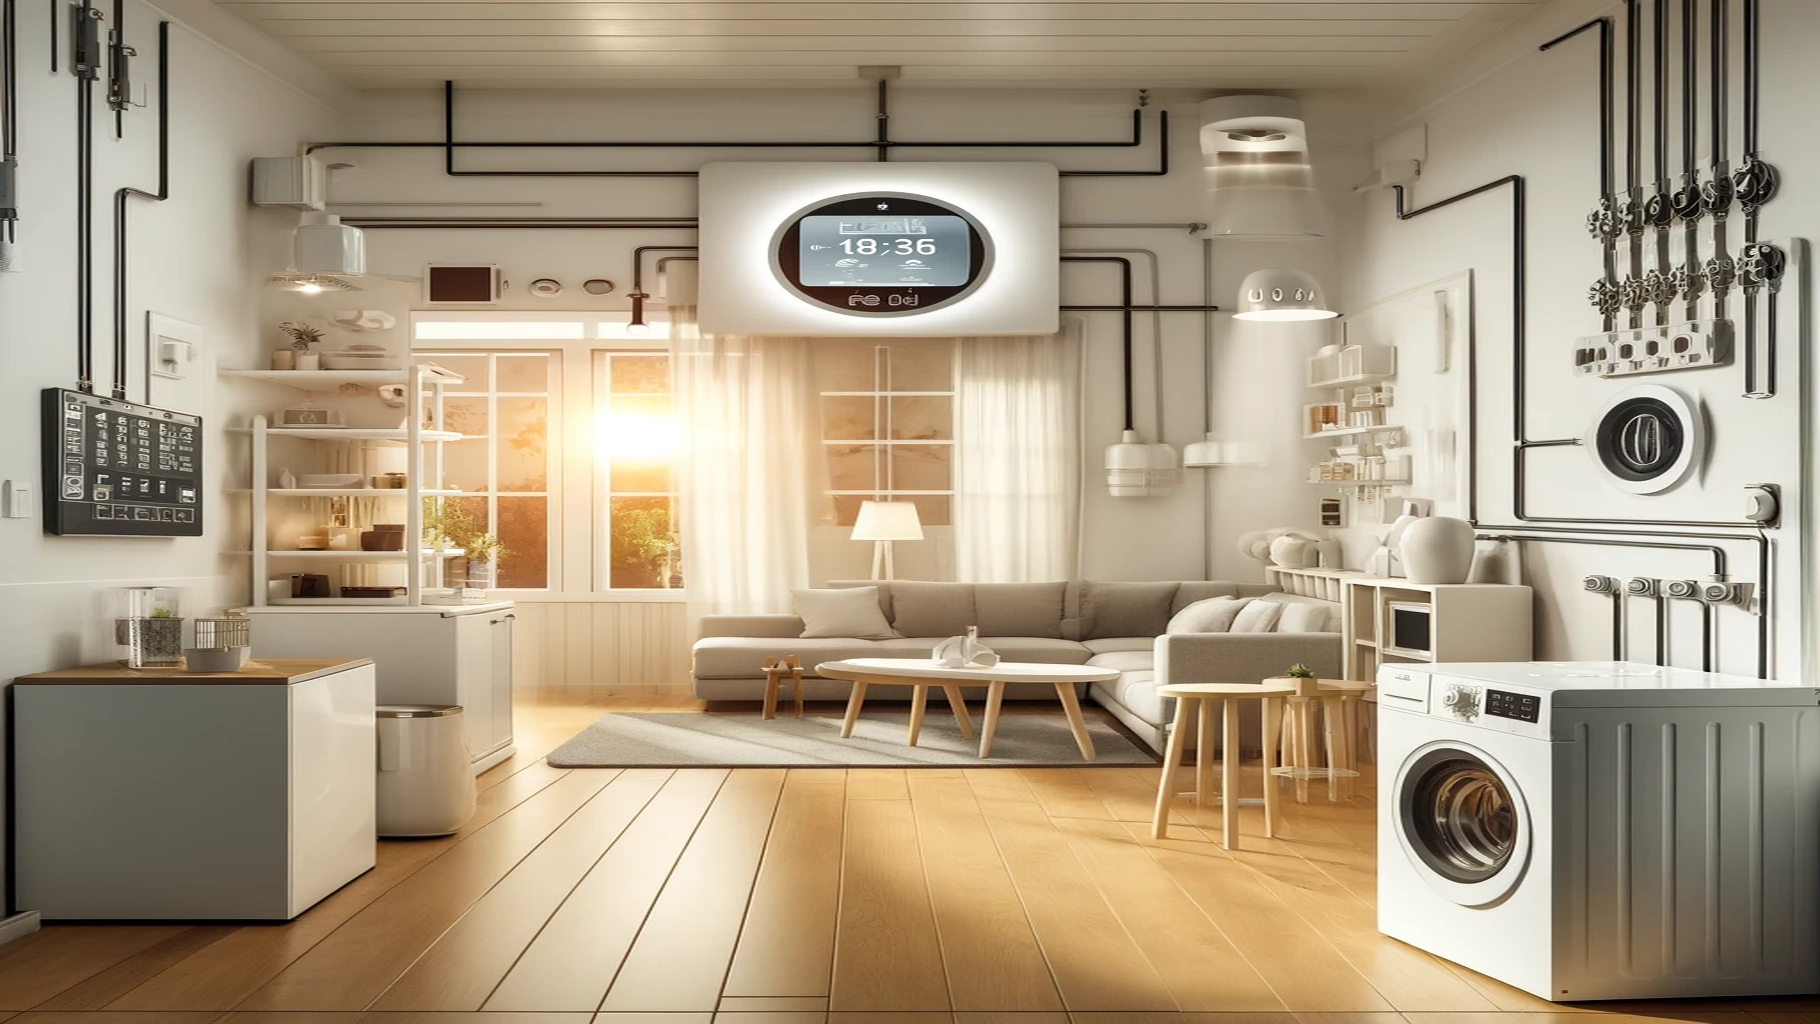

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

In [1]:
# seed the random numbers for reproducibility 
# do not remove this line
import random 
random.seed(10)

### 1. Analyse and visualise the data

#### 1.1. Read the dataset

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('energydata_complete.csv', parse_dates=['date'], dayfirst=True)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-02-14 00:00:00,50,10,21.790000,39.900000,20.100000,40.79,21.39,40.59,19.2,...,18.0,41.933333,2.90,732.90,98.000000,2.000000,31.0,2.6,48.320978,48.320978
1,2016-02-14 00:10:00,50,0,21.790000,39.900000,20.033333,40.73,21.39,40.59,19.2,...,18.0,42.133333,2.87,732.95,98.166667,2.166667,28.5,2.6,33.339359,33.339359
2,2016-02-14 00:20:00,60,10,21.700000,39.933333,19.890000,40.79,21.39,40.53,19.2,...,18.0,42.360000,2.83,733.00,98.333333,2.333333,26.0,2.6,8.168115,8.168115
3,2016-02-14 00:30:00,40,0,21.633333,39.860000,19.890000,40.79,21.39,40.59,19.2,...,18.0,42.633333,2.80,733.05,98.500000,2.500000,23.5,2.6,16.197509,16.197509
4,2016-02-14 00:40:00,60,10,21.600000,39.900000,19.790000,40.79,21.39,40.59,19.1,...,18.0,42.860000,2.77,733.10,98.666667,2.666667,21.0,2.6,12.559574,12.559574


In [3]:
# Add time-based features
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week_num'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['is_weekend'] = df['date'].dt.weekday >= 5
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day_of_week,day_of_week_num,month,is_weekend
0,2016-02-14 00:00:00,50,10,21.790000,39.900000,20.100000,40.790000,21.390000,40.590000,19.2,...,2.000000,31.000000,2.6,48.320978,48.320978,0,Sunday,6,2,True
1,2016-02-14 00:10:00,50,0,21.790000,39.900000,20.033333,40.730000,21.390000,40.590000,19.2,...,2.166667,28.500000,2.6,33.339359,33.339359,0,Sunday,6,2,True
2,2016-02-14 00:20:00,60,10,21.700000,39.933333,19.890000,40.790000,21.390000,40.530000,19.2,...,2.333333,26.000000,2.6,8.168115,8.168115,0,Sunday,6,2,True
3,2016-02-14 00:30:00,40,0,21.633333,39.860000,19.890000,40.790000,21.390000,40.590000,19.2,...,2.500000,23.500000,2.6,16.197509,16.197509,0,Sunday,6,2,True
4,2016-02-14 00:40:00,60,10,21.600000,39.900000,19.790000,40.790000,21.390000,40.590000,19.1,...,2.666667,21.000000,2.6,12.559574,12.559574,0,Sunday,6,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14936,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,3.333333,23.666667,13.3,43.096812,43.096812,17,Friday,4,5,False
14937,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,3.500000,24.500000,13.3,49.282940,49.282940,17,Friday,4,5,False
14938,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,3.666667,25.333333,13.3,29.199117,29.199117,17,Friday,4,5,False
14939,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,3.833333,26.166667,13.2,6.322784,6.322784,17,Friday,4,5,False


In [4]:
# date time year-month-day hour:minute:second 
# Appliances, energy use in Wh
# lights, energy use of light fixtures in the house in Wh
# T1, Temperature in kitchen area, in Celsius
# RH_1, Humidity in kitchen area, in %
# T2, Temperature in living room area, in Celsius
# RH_2, Humidity in living room area, in %
# T3, Temperature in laundry room area
# RH_3, Humidity in laundry room area, in %
# T4, Temperature in office room, in Celsius
# RH_4, Humidity in office room, in %
# T5, Temperature in bathroom, in Celsius
# RH_5, Humidity in bathroom, in %
# T6, Temperature outside the building (north side), in Celsius
# RH_6, Humidity outside the building (north side), in %
# T7, Temperature in ironing room , in Celsius
# RH_7, Humidity in ironing room, in %
# T8, Temperature in teenager room 2, in Celsius
# RH_8, Humidity in teenager room 2, in %
# T9, Temperature in parents room, in Celsius
# RH_9, Humidity in parents room, in %
# To_out, Temperature outside (from Chievres weather station), in Celsius
# Press_mg_hg, Pressure (from Chievres weather station), in mm Hg
# RH_out, Humidity outside (from Chievres weather station), in %
# Wind speed (from Chievres weather station), in m/s
# Visibility (from Chievres weather station), in km
# Tdewpoint (from Chievres weather station), Â°C
# rv1, Random variable 1, nondimensional
# rv2, Random variable 2, nondimensional

# !!!rv1 and rv2 are just for testing the robustness of the model, it should not rely on these variables
# the model should be able to predict the energy use without these variables
print(f"Shape of the df: {df.shape}")
print(f"Columns in the df: {df.columns}")

Shape of the df: (14941, 34)
Columns in the df: Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'hour', 'day_of_week',
       'day_of_week_num', 'month', 'is_weekend'],
      dtype='object')


#### 1.2. Analyse data characteristics

In [5]:
# Analyse data characteristics (dependencies, distributions, etc.) that may affect the prediction task, and visualise them using suitable techniques and charts. Include required charts, diagrams, tables and discussion in Jupyter Notebook.
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             14941 non-null  datetime64[ns]
 1   Appliances       14941 non-null  int64         
 2   lights           14941 non-null  int64         
 3   T1               14941 non-null  float64       
 4   RH_1             14941 non-null  float64       
 5   T2               14941 non-null  float64       
 6   RH_2             14941 non-null  float64       
 7   T3               14941 non-null  float64       
 8   RH_3             14941 non-null  float64       
 9   T4               14941 non-null  float64       
 10  RH_4             14941 non-null  float64       
 11  T5               14941 non-null  float64       
 12  RH_5             14941 non-null  float64       
 13  T6               14941 non-null  float64       
 14  RH_6             14941 non-null  float

In [6]:
# checking for missing values
df.isnull().sum()

date               0
Appliances         0
lights             0
T1                 0
RH_1               0
T2                 0
RH_2               0
T3                 0
RH_3               0
T4                 0
RH_4               0
T5                 0
RH_5               0
T6                 0
RH_6               0
T7                 0
RH_7               0
T8                 0
RH_8               0
T9                 0
RH_9               0
T_out              0
Press_mm_hg        0
RH_out             0
Windspeed          0
Visibility         0
Tdewpoint          0
rv1                0
rv2                0
hour               0
day_of_week        0
day_of_week_num    0
month              0
is_weekend         0
dtype: int64

In [7]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Energy Usage (Wh)')

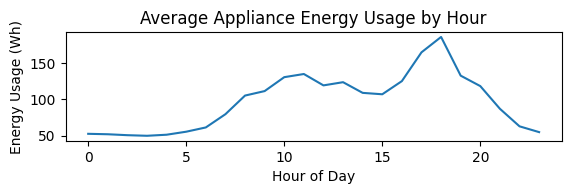

In [8]:
plt.subplot(3, 1, 1)
daily_energy = df.groupby('hour')['Appliances'].mean()
sns.lineplot(x=daily_energy.index, y=daily_energy.values)
plt.title('Average Appliance Energy Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Usage (Wh)')

In [9]:
# around 10 and dinner time 
# late night and morning are the lowest 
# => Useful

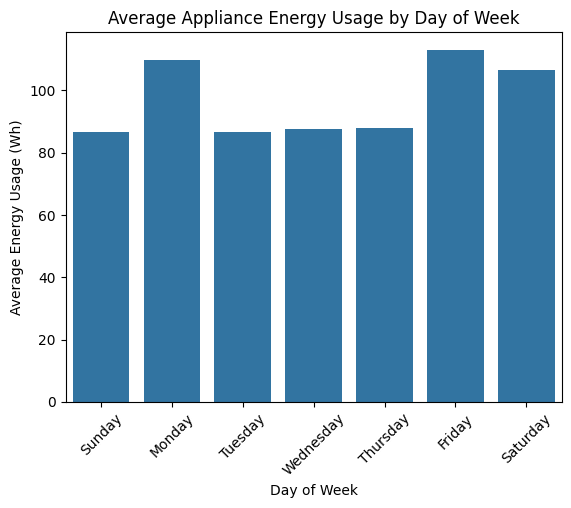

In [10]:
# Average appliance energy usage by day of the week
avg_energy_by_day = df.groupby('day_of_week')['Appliances'].mean()

days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Ensure the days are in the correct order
avg_energy_by_day = avg_energy_by_day.reindex(days_order)

# Plot using a bar chart
sns.barplot(x=avg_energy_by_day.index, y=avg_energy_by_day.values)
plt.title('Average Appliance Energy Usage by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy Usage (Wh)')
plt.xticks(rotation=45)
plt.show()


In [11]:
avg_energy_by_day

day_of_week
Sunday        86.773148
Monday       109.814815
Tuesday       86.569444
Wednesday     87.481481
Thursday      88.037037
Friday       112.997647
Saturday     106.468254
Name: Appliances, dtype: float64

In [12]:
# weekend a monday are usually used => Useful

Text(0, 0.5, 'Energy Usage (Wh)')

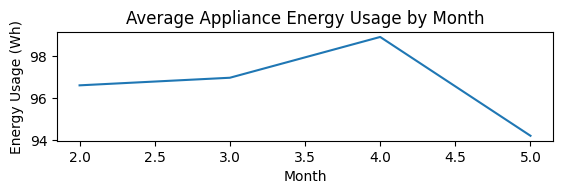

In [13]:
# Monthly pattern
plt.subplot(3, 1, 3)
monthly_energy = df.groupby('month')['Appliances'].mean()
sns.lineplot(x=monthly_energy.index, y=monthly_energy.values)
plt.title('Average Appliance Energy Usage by Month')
plt.xlabel('Month')
plt.ylabel('Energy Usage (Wh)')

In [14]:
#april are the most used => Not sure if it is useful

Text(0.5, 1.0, 'Average Indoor Temperature vs Energy Usage')

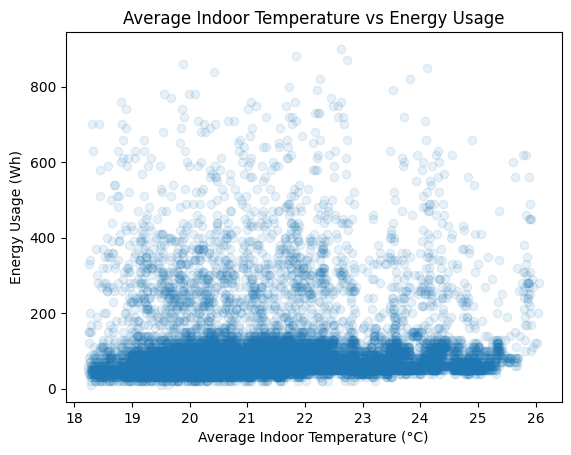

In [15]:
# avarage inside temp impact on energy usage
avg_indoor_temps = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']].mean(axis=1)
plt.scatter(avg_indoor_temps, df['Appliances'], alpha=0.1)
plt.xlabel('Average Indoor Temperature (°C)')
plt.ylabel('Energy Usage (Wh)')
plt.title('Average Indoor Temperature vs Energy Usage')

In [16]:
#Does not show any obvious correlation

Text(0.5, 1.0, 'Indoor vs Outdoor Temperature')

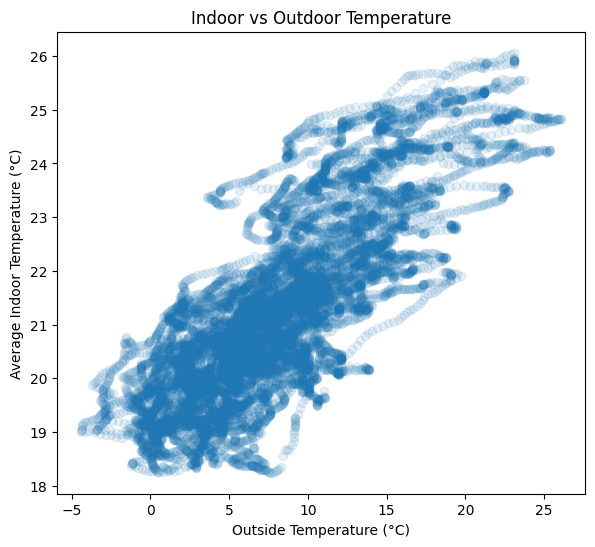

In [17]:
# indoor vs outdoor
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['T_out'], avg_indoor_temps, alpha=0.1)
plt.xlabel('Outside Temperature (°C)')
plt.ylabel('Average Indoor Temperature (°C)')
plt.title('Indoor vs Outdoor Temperature')

In [18]:
# indoor and outdoor might be correlated. Higher indoor mean higher outdoor

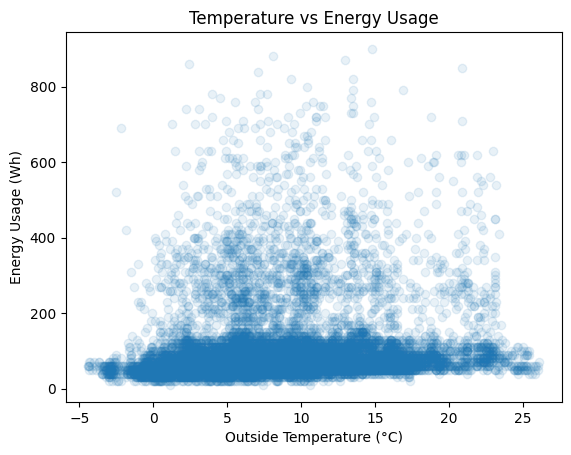

In [19]:

# Outside temp impact on energy usage
plt.scatter(df['T_out'], df['Appliances'], alpha=0.1)
plt.xlabel('Outside Temperature (°C)')
plt.ylabel('Energy Usage (Wh)')
plt.title('Temperature vs Energy Usage')
plt.show()

<Figure size 1200x600 with 0 Axes>

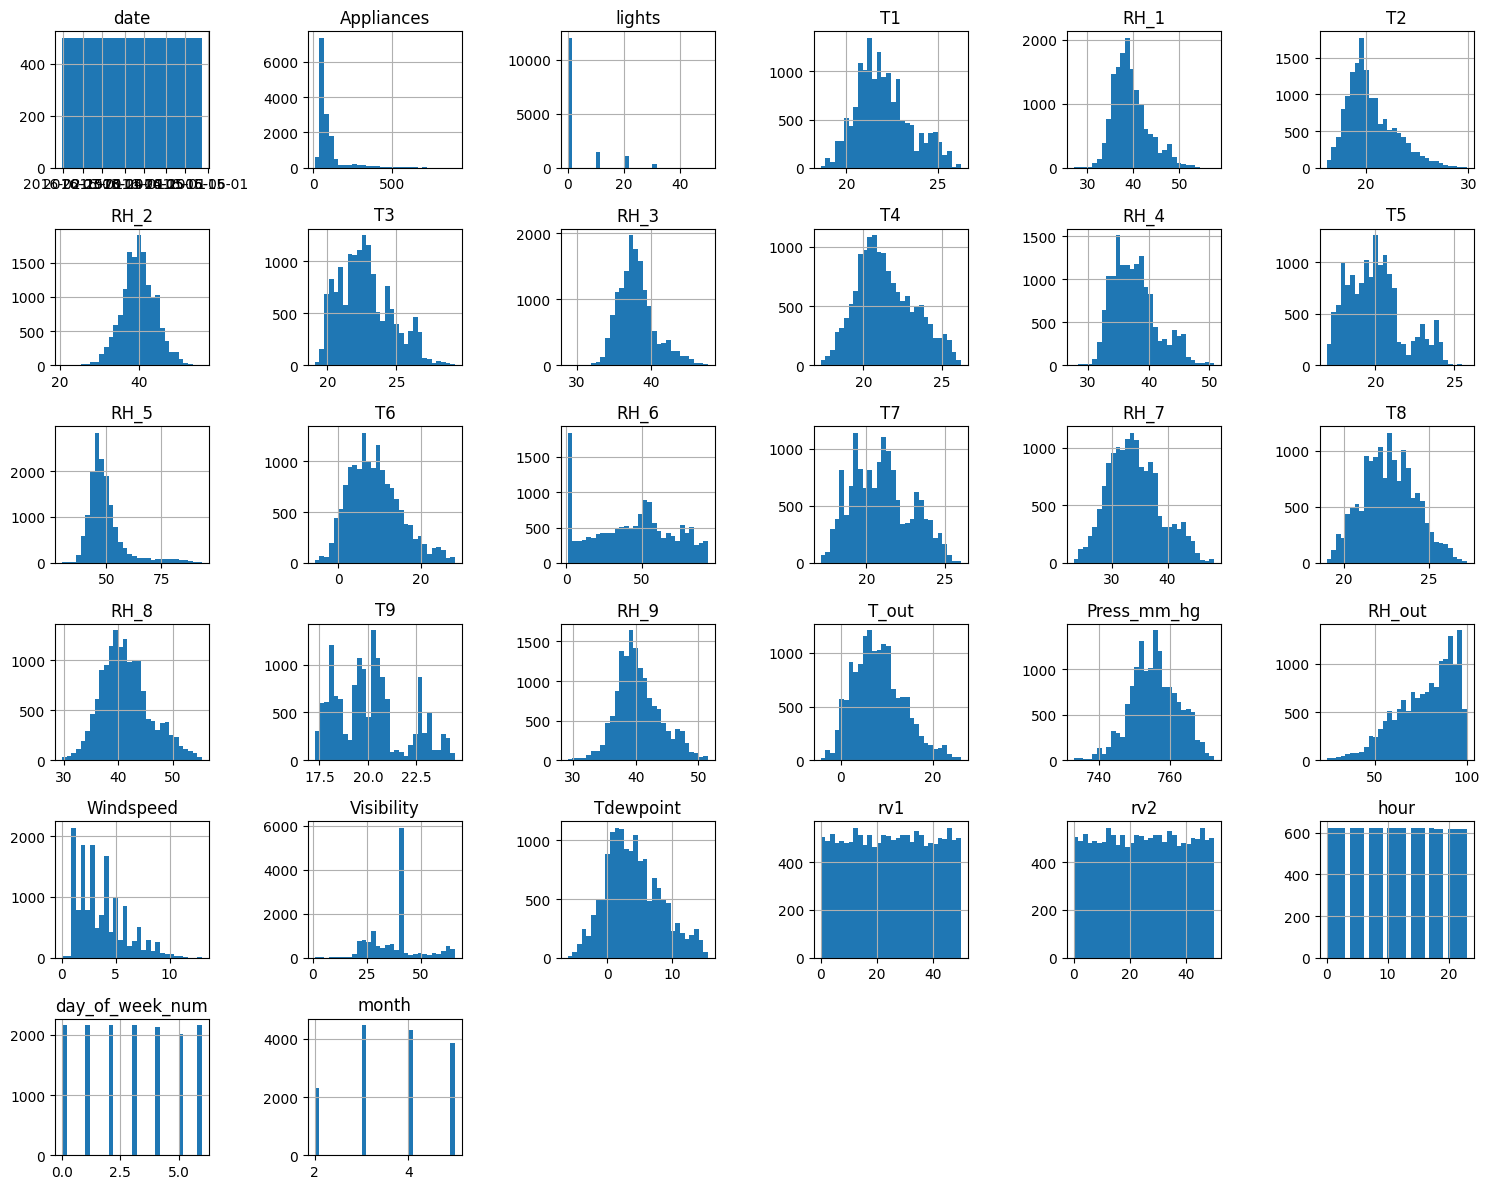

In [20]:
plt.figure(figsize=(12, 6))
df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

In [21]:
# some of them are normally distributed, some are not
# some implications for the model:
#1. statistical models assume normal distribution like linear regression might not work well
#2. can use log to normalize the data
#3. Outliers
#4. Need data understanding to decide which model to use
#5. Need to handle skewed data

lights
0     0.804163
10    0.095241
20    0.075296
30    0.023626
40    0.001539
50    0.000134
Name: proportion, dtype: float64

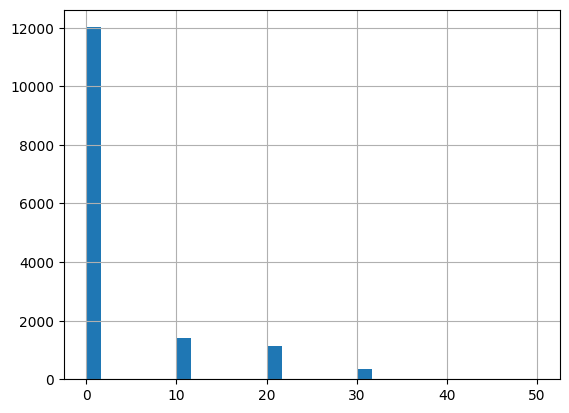

In [22]:
df['lights'].hist(bins=30)

df['lights'].value_counts(normalize=True)

In [23]:
#80% is 0 => useless

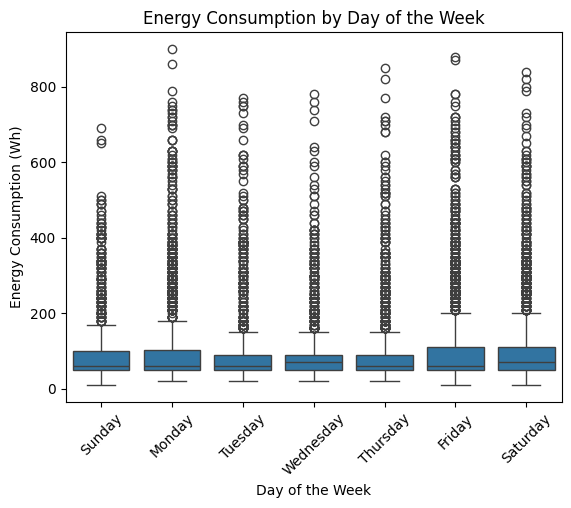

In [24]:
sns.boxplot(x='day_of_week', y='Appliances', data=df, order=days_order)
plt.title('Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.show()

In [25]:
#Friday, Saturday Sunday and Monday have higher energy usage, alot of outliers above 200

In [26]:
#does not show nay correlation => Temp might be useless

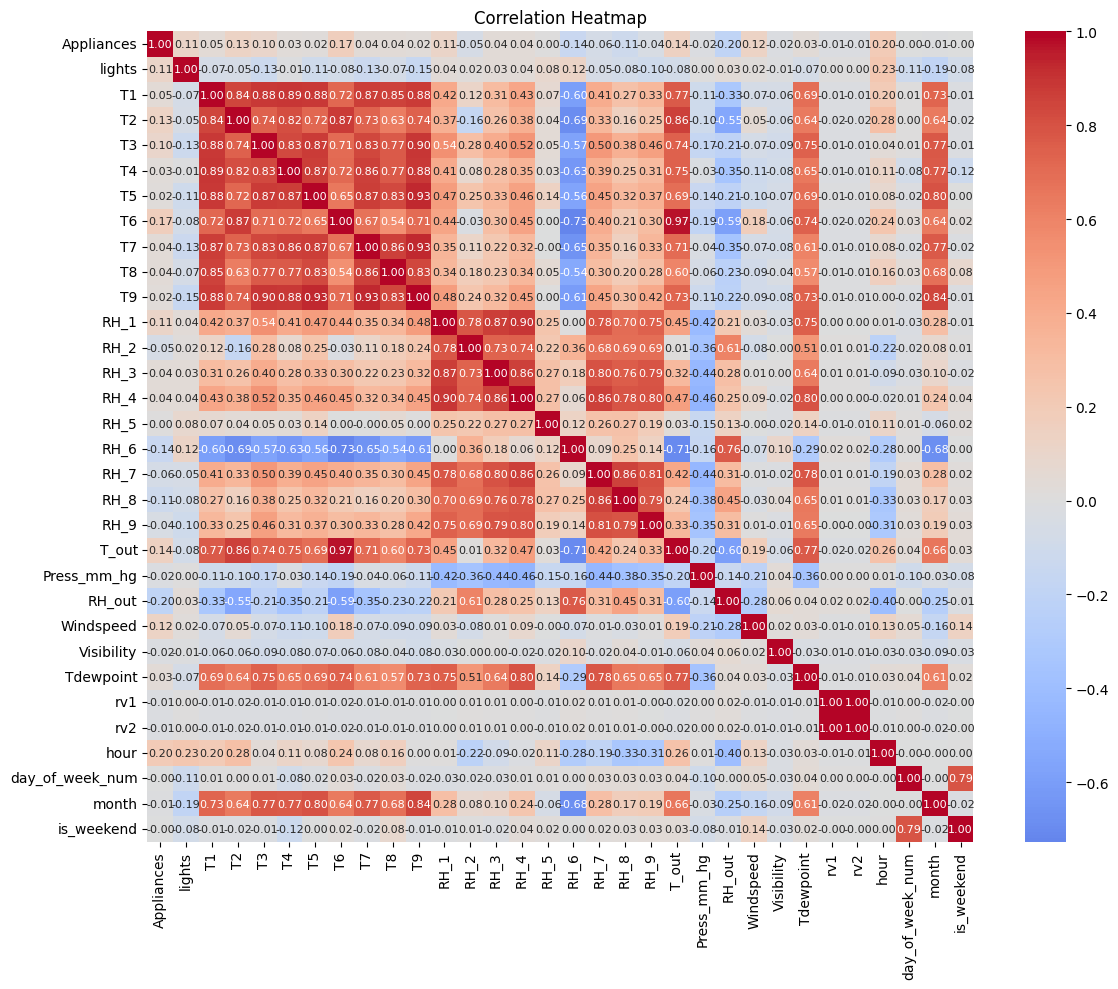

In [27]:
def analyze_correlations_heatmap(df):
    # Select relevant columns
    temp_cols = [f'T{i}' for i in range(1, 10)]
    humidity_cols = [f'RH_{i}' for i in range(1, 10)]
    weather_cols = ['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
    random_variable_cols = ['rv1', 'rv2']
    periods_cols = ['hour', 'day_of_week_num', 'month', 'is_weekend']
    
    # Calculate correlations
    cols_to_analyze = ['Appliances', 'lights'] + temp_cols + humidity_cols + weather_cols + random_variable_cols + periods_cols
    corr_matrix = df[cols_to_analyze].corr()
    
    # Plot heatmap with correlation values
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f",
                xticklabels=True, yticklabels=True, annot_kws={"size": 8})
    
    # Customize appearance
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix['Appliances'].sort_values(ascending=False)

corr = analyze_correlations_heatmap(df)


In [28]:
# appliance are not strongly correlated with any of the features, indicating non-linear relationship -> need to use non-linear models

In [29]:
# indoor and outdoor doesnt matter that much 

In [30]:
# indoor_temps

In [31]:
# 3. Discuss the results of your analysis and visualisation. Make sure your charts are of good quality and useful, there is no point to make a chart or a table, if it is not referred to in your discussion. 


### 2. Pre-process the data

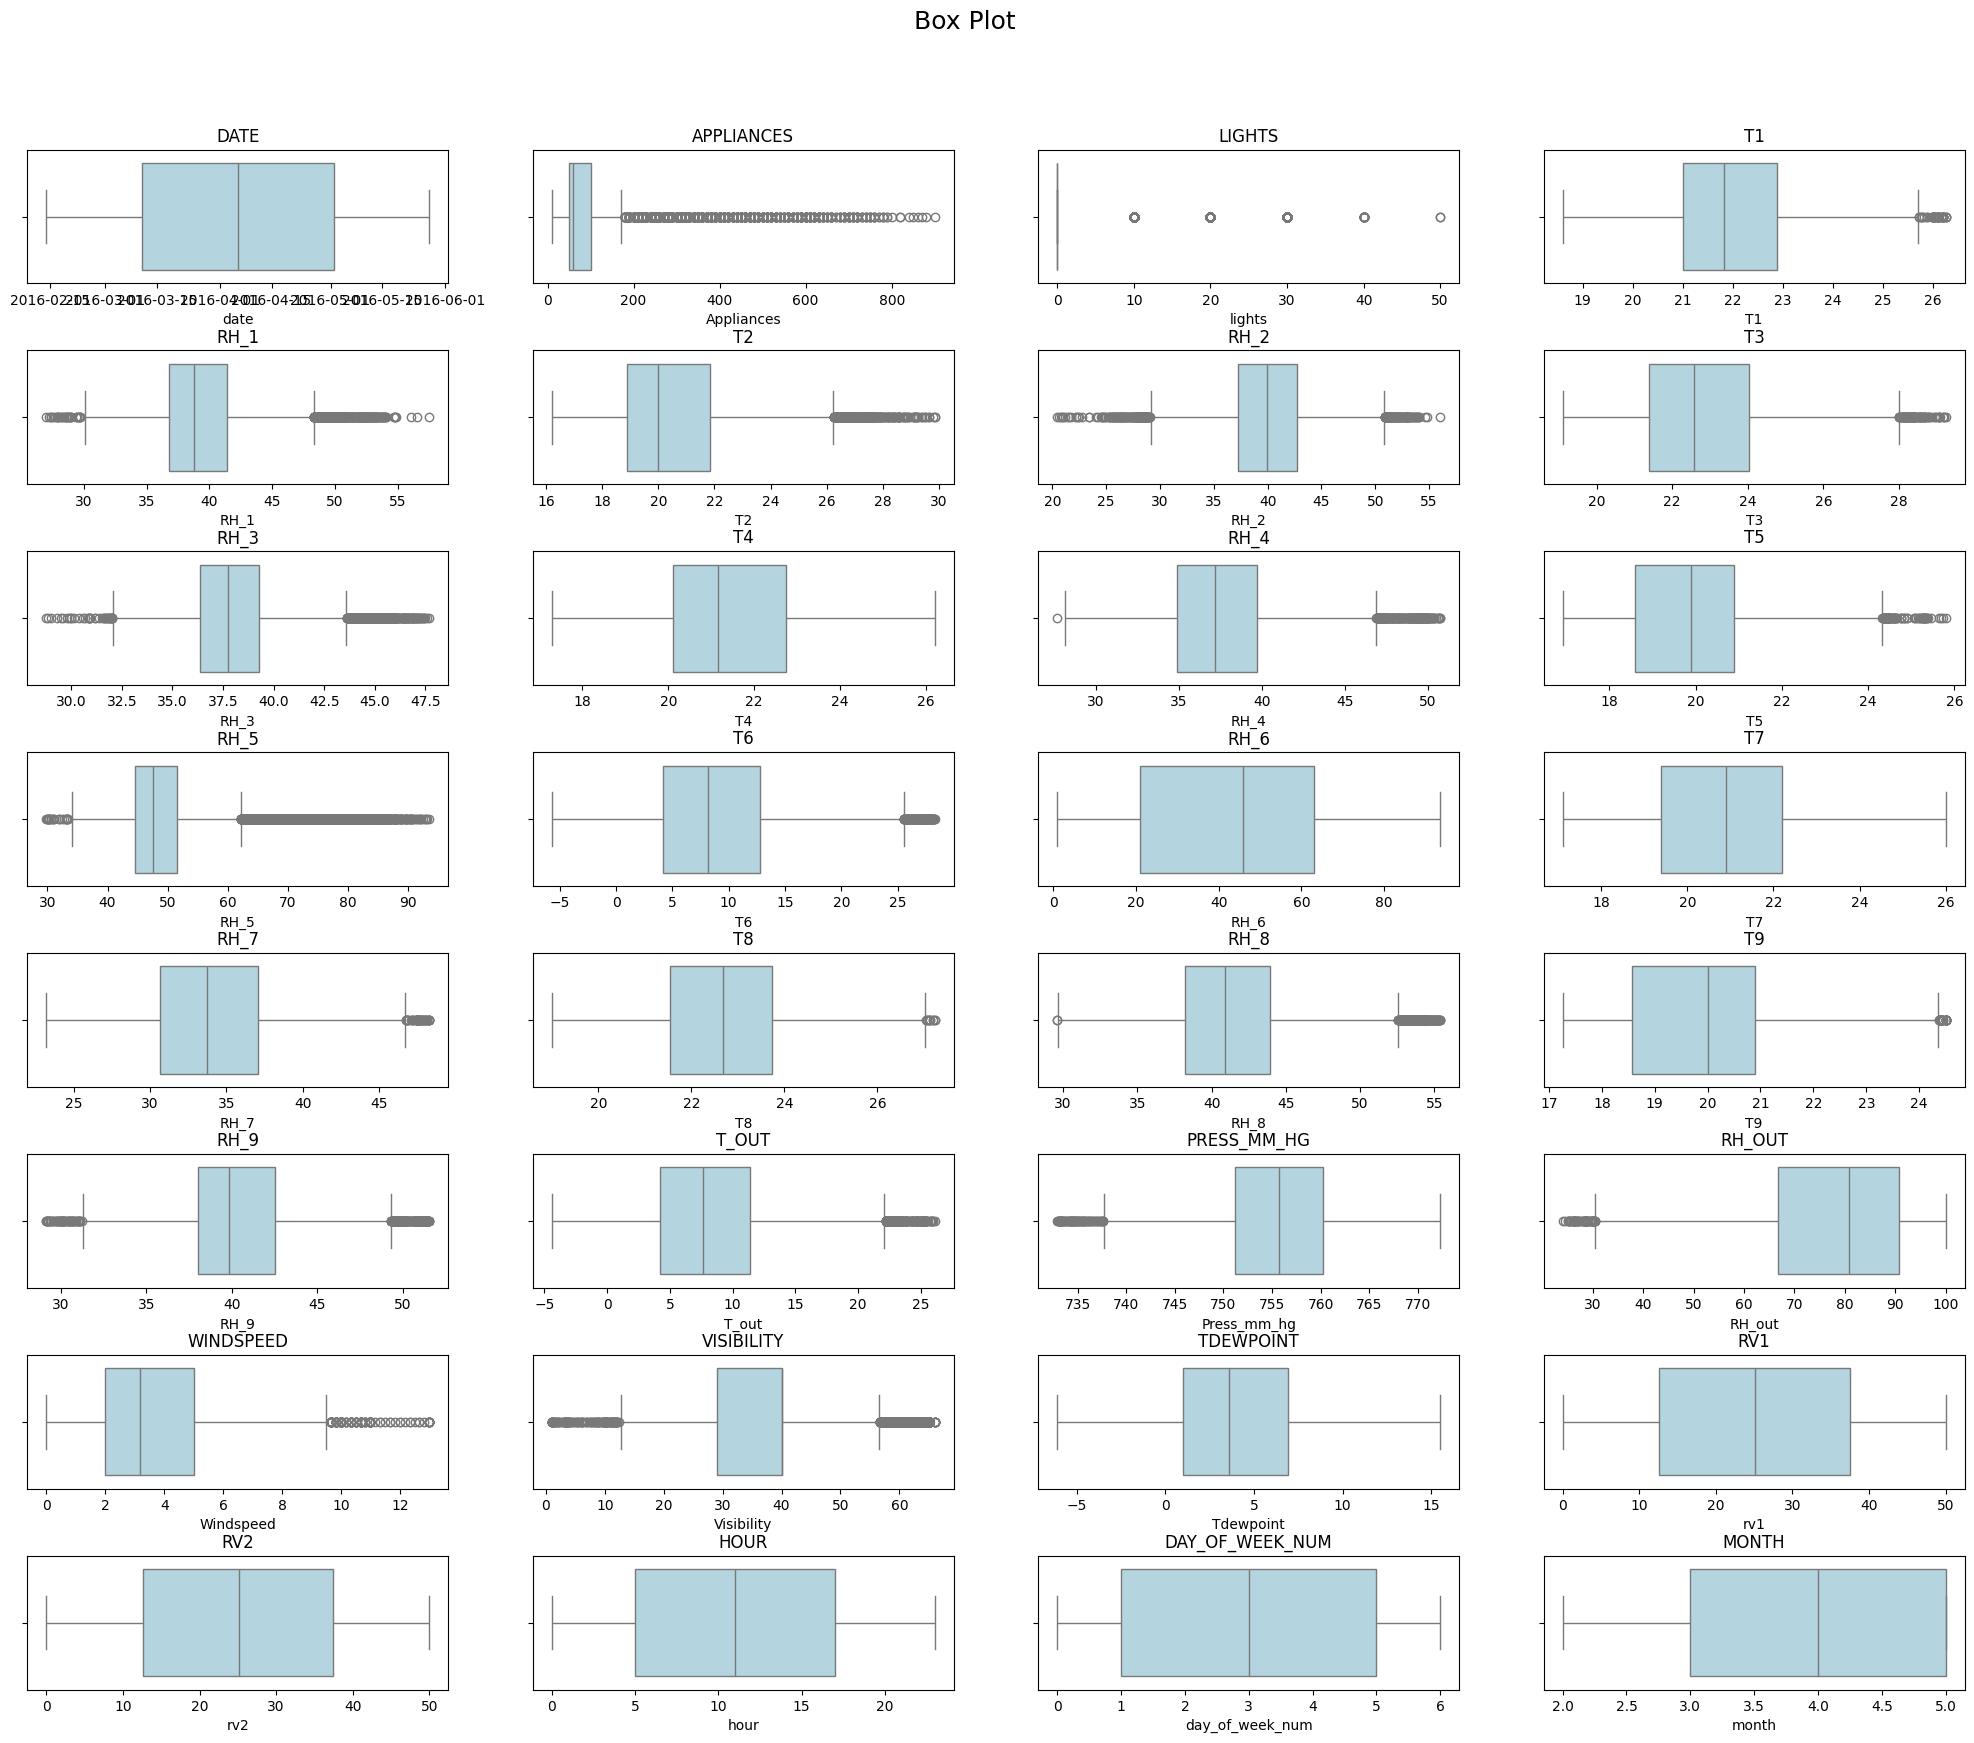

In [32]:
col_list = list(df.describe().columns)

plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker], color='lightblue', ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())

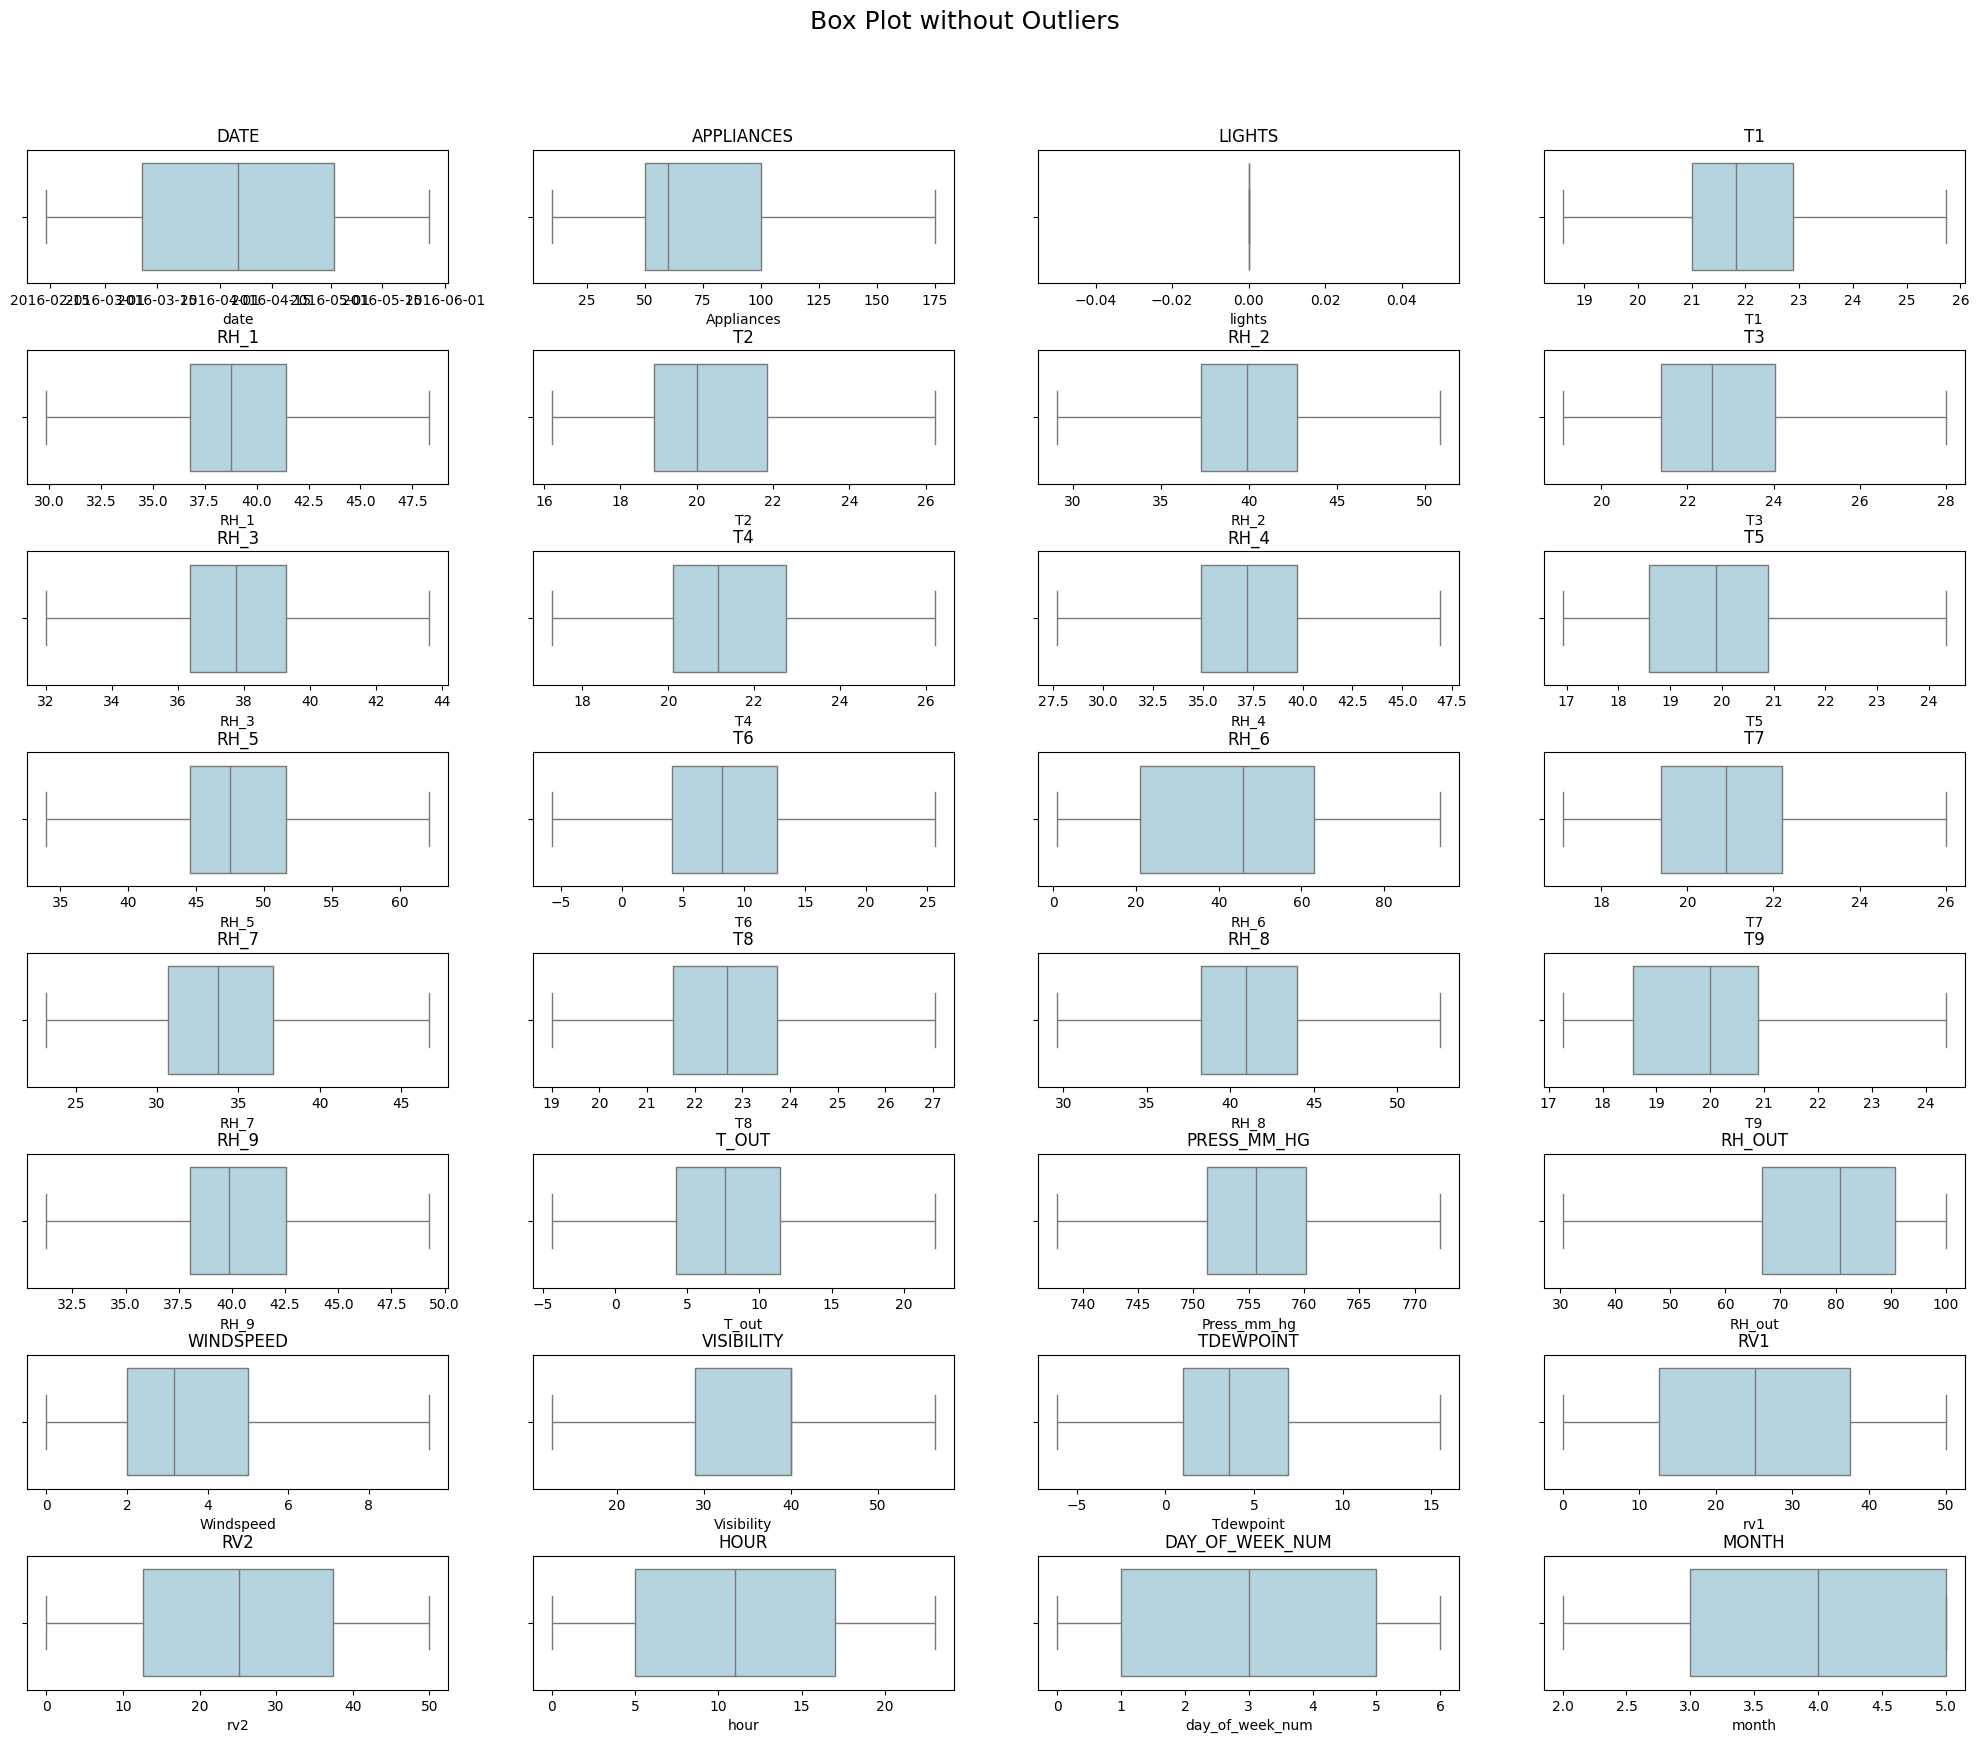

In [33]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

columns_to_check = df.describe().columns
for col in columns_to_check:
    df = handle_outliers(df, col)

col_list = list(df.describe().columns)

plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker], color='lightblue', ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())

### 3. Implement, train and select prediction models

In [34]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'hour', 'day_of_week',
       'day_of_week_num', 'month', 'is_weekend'],
      dtype='object')

In [35]:
df['avg_indoor_temp'] = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']].mean(axis=1)
df['avg_indoor_humidity'] = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9']].mean(axis=1)

df['temp_diff'] = abs(df['avg_indoor_temp'] - df['T_out'])
df['humidity_diff'] = abs(df['avg_indoor_humidity'] - df['RH_out'])

df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv2,hour,day_of_week,day_of_week_num,month,is_weekend,avg_indoor_temp,avg_indoor_humidity,temp_diff,humidity_diff
0,2016-02-14 00:00:00,50,0,21.790000,39.900000,20.100000,40.790000,21.390000,40.590000,19.2,...,48.320978,0,Sunday,6,2,True,19.946250,42.250417,17.046250,55.749583
1,2016-02-14 00:10:00,50,0,21.790000,39.900000,20.033333,40.730000,21.390000,40.590000,19.2,...,33.339359,0,Sunday,6,2,True,19.937917,42.311736,17.067917,55.854931
2,2016-02-14 00:20:00,60,0,21.700000,39.933333,19.890000,40.790000,21.390000,40.530000,19.2,...,8.168115,0,Sunday,6,2,True,19.901875,42.391042,17.071875,55.942292
3,2016-02-14 00:30:00,40,0,21.633333,39.860000,19.890000,40.790000,21.390000,40.590000,19.2,...,16.197509,0,Sunday,6,2,True,19.887778,42.455417,17.087778,56.044583
4,2016-02-14 00:40:00,60,0,21.600000,39.900000,19.790000,40.790000,21.390000,40.590000,19.1,...,12.559574,0,Sunday,6,2,True,19.860139,42.518681,17.090139,56.147986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14936,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,43.096812,17,Friday,4,5,False,24.869583,46.137881,2.714583,9.528786
14937,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,49.282940,17,Friday,4,5,False,24.846810,46.089286,2.691810,9.910714
14938,2016-05-27 17:40:00,175,0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,29.199117,17,Friday,4,5,False,24.818571,46.237738,2.663571,10.095595
14939,2016-05-27 17:50:00,175,0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,6.322784,17,Friday,4,5,False,24.758312,46.242246,2.603312,10.424421


In [36]:
# drop random variables as it does not look like that much important while predicting the output
columns_to_drop = ['rv1','rv2', 'day_of_week', 'lights']
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
df.shape

(14941, 34)

In [38]:
#Spliting
train_dev_size = int(len(df) * 0.75)

dev_size = int(train_dev_size*0.8)

df_train_dev = df.iloc[:train_dev_size] # first 75% of the data
df_test = df.iloc[train_dev_size:] # remaining 25% of the data

df_train = df_train_dev.iloc[:dev_size] 
df_dev = df_train_dev.iloc[dev_size:]

X_train = df_train.drop(columns=['Appliances', 'date'])
y_train = df_train['Appliances']

X_dev = df_dev.drop(columns=['Appliances', 'date'])
y_dev = df_dev['Appliances']

X_test = df_test.drop(columns=['Appliances', 'date'])
y_test = df_test['Appliances']

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_dev shape: {X_dev.shape}")
print(f"y_dev shape: {y_dev.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8964, 32)
y_train shape: (8964,)
X_dev shape: (2241, 32)
y_dev shape: (2241,)
X_test shape: (3736, 32)
y_test shape: (3736,)


In [58]:
X_train

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Visibility,Tdewpoint,hour,day_of_week_num,month,is_weekend,avg_indoor_temp,avg_indoor_humidity,temp_diff,humidity_diff
0,21.790000,39.900000,20.100000,40.79,21.390000,40.590000,19.2,41.00,18.200000,52.000000,...,31.000000,2.60,0,6,2,True,19.946250,42.250417,17.046250,55.749583
1,21.790000,39.900000,20.033333,40.73,21.390000,40.590000,19.2,41.06,18.200000,52.015000,...,28.500000,2.60,0,6,2,True,19.937917,42.311736,17.067917,55.854931
2,21.700000,39.933333,19.890000,40.79,21.390000,40.530000,19.2,41.09,18.200000,52.090000,...,26.000000,2.60,0,6,2,True,19.901875,42.391042,17.071875,55.942292
3,21.633333,39.860000,19.890000,40.79,21.390000,40.590000,19.2,41.09,18.188889,52.090000,...,23.500000,2.60,0,6,2,True,19.887778,42.455417,17.087778,56.044583
4,21.600000,39.900000,19.790000,40.79,21.390000,40.590000,19.1,41.09,18.161111,52.090000,...,21.000000,2.60,0,6,2,True,19.860139,42.518681,17.090139,56.147986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8959,22.000000,41.700000,19.600000,45.09,24.133333,39.900000,21.7,40.20,20.790000,50.626667,...,27.833333,7.35,5,5,4,True,21.675417,43.252083,12.455417,44.914583
8960,21.890000,41.730000,19.600000,45.20,24.133333,39.900000,21.7,40.26,20.790000,50.560000,...,27.666667,7.40,5,5,4,True,21.657917,43.264583,12.427917,45.068750
8961,21.890000,41.790000,19.600000,45.20,24.133333,39.900000,21.7,40.29,20.790000,50.500000,...,27.500000,7.45,5,5,4,True,21.657917,43.275833,12.407917,45.224167
8962,21.890000,41.790000,19.566667,45.23,24.200000,39.900000,21.7,40.29,20.790000,50.400000,...,27.333333,7.50,5,5,4,True,21.654583,43.275000,12.384583,45.391667


In [39]:
from sklearn.preprocessing import StandardScaler

# Scale the data (Fit only on Train, then transform Dev & Test)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

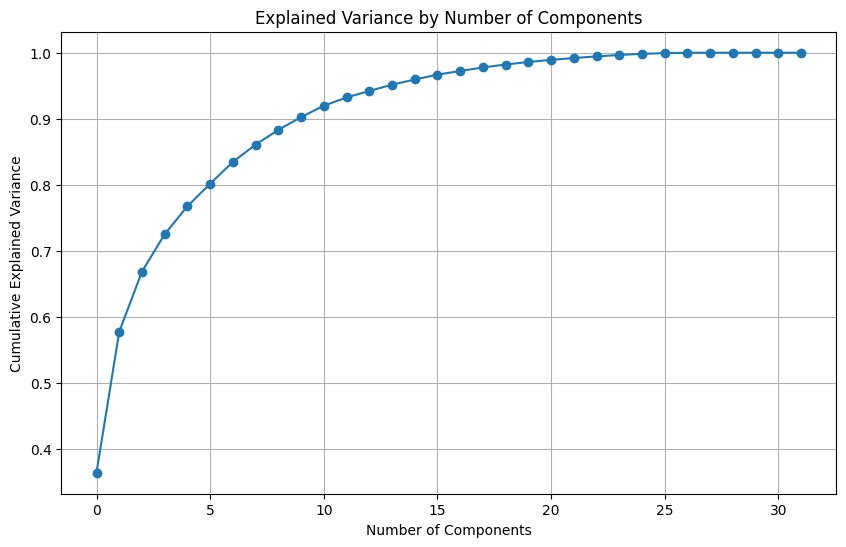

In [40]:
import numpy as np
from sklearn.decomposition import PCA

# Choose the number of components for PCA
pca = PCA()
pca.fit(X_train_scaled)

# Plot the explained variance ratio to determine the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [41]:
# choose 10 components as it is the elbow point

n_components = 10
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)
X_dev_pca = pca.transform(X_dev_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_dev_pca shape: {X_dev_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

X_train_pca shape: (8964, 10)
X_dev_pca shape: (2241, 10)
X_test_pca shape: (3736, 10)


### 4. Test the final model and analyse results

#### Linear regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate_model(trained_model, X, y):
    y_pred = trained_model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    return mse, r2

In [55]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_train_acc = lr_model.score(X_train_scaled, y_train)
print(f"Linear Regression Training Accuracy: {lr_train_acc}")

lr_mse, lr_r2 = evaluate_model(lr_model, X_dev_scaled, y_dev)

Linear Regression Training Accuracy: 0.3175690205041829
MSE: 1401.5357852642687
R2 Score: 0.16831536060471175


In [56]:
from sklearn import svm

svm_model = svm.SVR(gamma='scale')
svm_model.fit(X_train_scaled, y_train)

svm_train_acc = svm_model.score(X_train_scaled, y_train)
print(f"SVM Training Accuracy: {svm_train_acc}")

svm_mse, svm_r2 = evaluate_model(svm_model, X_dev_scaled, y_dev)


SVM Training Accuracy: 0.2690953487790819
MSE: 1598.622529107161
R2 Score: 0.051362215914467324


In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X_train_scaled, y_train)

rf_train_acc = rf_model.score(X_train_scaled, y_train)
print(f"Random Forest Training Accuracy: {rf_train_acc}")

rf_mse, rf_r2 = evaluate_model(rf_model, X_dev_scaled, y_dev)

Random Forest Training Accuracy: 0.9663969745196138
MSE: 1189.4455879071843
R2 Score: 0.294171697034211


### 5. Reflection

Follow the guidelines in the assignment specification


### 6. References

### 7. Appendix

Use this section as needed for longer analysis and expanded charting